In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/databank/marketbank.csv")
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
2,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
3,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
4,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no


In [ ]:
data.shape

(30488, 21)

In [ ]:
print(data['y'].value_counts())

no     26629
yes     3859
Name: y, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   duration        30488 non-null  int64  
 2   campaign        30488 non-null  int64  
 3   pdays           30488 non-null  int64  
 4   previous        30488 non-null  int64  
 5   emp.var.rate    30488 non-null  float64
 6   cons.price.idx  30488 non-null  float64
 7   cons.conf.idx   30488 non-null  float64
 8   euribor3m       30488 non-null  float64
 9   nr.employed     30488 non-null  float64
 10  job             30488 non-null  object 
 11  marital         30488 non-null  object 
 12  education       30488 non-null  object 
 13  default         30488 non-null  object 
 14  housing         30488 non-null  object 
 15  loan            30488 non-null  object 
 16  contact         30488 non-null  object 
 17  month           30488 non-null 

In [ ]:
from imblearn.over_sampling import SMOTENC
X = data.drop('y', axis=1)
y = data.y

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm = SMOTENC(random_state=42, categorical_features=[10,11,12,13,14,15,16,17,18,19])
X_res, y_res =sm.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'no': 26629, 'yes': 26629})


In [ ]:
X_res.shape, y_res.shape

((53258, 20), (53258,))

In [ ]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
dfx=pd.DataFrame(X_res, columns=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
dfy=pd.DataFrame(y_res, columns=['y'])
df=pd.concat([dfx, dfy], axis=1)

In [ ]:
dfx.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
2,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
3,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
4,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent


In [ ]:
df["age"]=df["age"].astype(int)
df["duration"]=df["duration"].astype(int)
df["campaign"]=df["campaign"].astype(int)
df["pdays"]=df["pdays"].astype(int)
df["previous"]=df["previous"].astype(int)
df["emp.var.rate"]=df["emp.var.rate"].astype(float)
df["cons.price.idx"]=df["cons.price.idx"].astype(float)
df["cons.conf.idx"]=df["cons.conf.idx"].astype(float)
df["euribor3m"]=df["euribor3m"].astype(float)
df["nr.employed"]=df["nr.employed"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53258 entries, 0 to 53257
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             53258 non-null  int64  
 1   duration        53258 non-null  int64  
 2   campaign        53258 non-null  int64  
 3   pdays           53258 non-null  int64  
 4   previous        53258 non-null  int64  
 5   emp.var.rate    53258 non-null  float64
 6   cons.price.idx  53258 non-null  float64
 7   cons.conf.idx   53258 non-null  float64
 8   euribor3m       53258 non-null  float64
 9   nr.employed     53258 non-null  float64
 10  job             53258 non-null  object 
 11  marital         53258 non-null  object 
 12  education       53258 non-null  object 
 13  default         53258 non-null  object 
 14  housing         53258 non-null  object 
 15  loan            53258 non-null  object 
 16  contact         53258 non-null  object 
 17  month           53258 non-null 

In [ ]:
X_new = df.drop('y',axis=1)
y_new = df.y

In [ ]:
import numpy as np
cat_features = np.where(X_new.dtypes != np.float)[0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, train_size=0.8, random_state=42)

In [ ]:
import hyperopt

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        iterations=500,
        eval_metric='Accuracy',
        random_seed=42,
        verbose=False,
        loss_function='Logloss',
    )
    
    cv_data = cv(
        Pool(X_train, y_train, cat_features=cat_features),
        model.get_params()
    )
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
from numpy.random import RandomState

params_space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
    'max_depth': hyperopt.hp.choice('max_depth', np.arange(5, 11))
}

trials = hyperopt.Trials()

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=25,
    trials=trials,
    rstate=RandomState(123)
)

print(best)

100%|██████████| 25/25 [1:44:19<00:00, 250.38s/it, best loss: 0.06236211874411113]
{'l2_leaf_reg': 2.0, 'learning_rate': 0.17769813574054494, 'max_depth': 2}


In [ ]:
model = CatBoostClassifier(
        l2_leaf_reg=int(best['l2_leaf_reg']),
        learning_rate=best['learning_rate'],
        max_depth=best['max_depth'],
        eval_metric='AUC',
        random_seed=42,
        verbose=False,
        loss_function='Logloss',
)
cv_data = cv(Pool(X_train, y_train, cat_features=cat_features), model.get_params())

In [ ]:
cv_data

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.765161,0.005434,0.642058,0.001059,0.641925,0.000302
1,1,0.869536,0.003165,0.575553,0.002134,0.575443,0.002180
2,2,0.882335,0.002849,0.528024,0.001864,0.528314,0.002316
3,3,0.881439,0.001263,0.498249,0.002102,0.498574,0.001872
4,4,0.889572,0.003372,0.466554,0.003298,0.466371,0.005831
...,...,...,...,...,...,...,...
995,995,0.983403,0.000962,0.165917,0.004016,0.161332,0.002043
996,996,0.983404,0.000960,0.165912,0.004011,0.161330,0.002042
997,997,0.983407,0.000960,0.165901,0.004011,0.161321,0.002040
998,998,0.983407,0.000962,0.165899,0.004026,0.161315,0.002038


In [ ]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-AUC-mean'])))

Precise validation accuracy score: 0.9834116591983967


In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [ ]:
model.fit(X_train, y_train, cat_features=cat_features)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
import catboost as cb
import catboost.utils as cbu

In [ ]:
def calculate_score_on_dataset_and_show_graph(X, y, model):
    import sklearn.metrics
    import matplotlib.pylab as pl
    pl.style.use('ggplot')
    
    dataset = cb.Pool(X, y, cat_features=np.where(X.dtypes != np.float)[0])
    fpr, tpr, _ = cbu.get_roc_curve(model, dataset, plot=True)
    auc = sklearn.metrics.auc(fpr, tpr)
    return auc

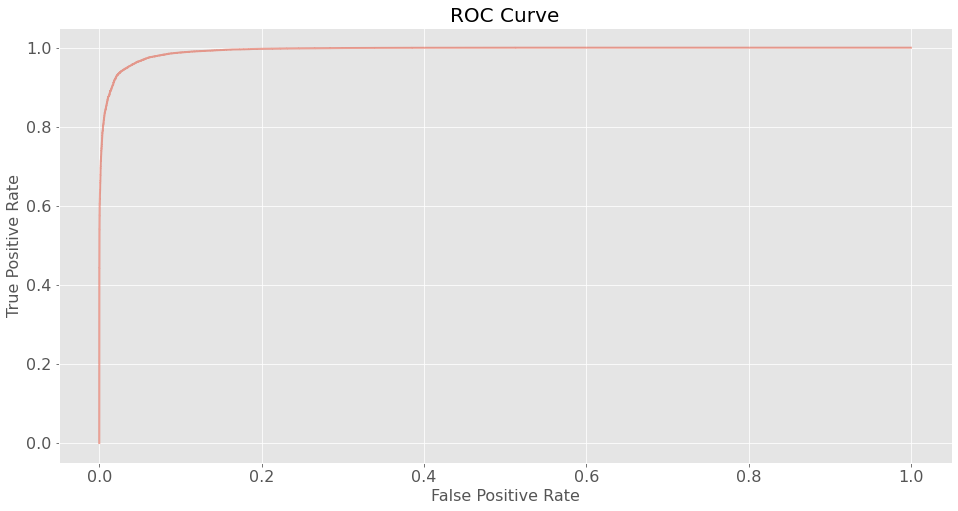

0.9932783818014205

In [ ]:
calculate_score_on_dataset_and_show_graph(X_train, y_train, model)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4905,  395],
       [ 295, 5057]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9352234322193015

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.93      0.95      0.94      5300
         yes       0.95      0.93      0.94      5352

    accuracy                           0.94     10652
   macro avg       0.94      0.94      0.94     10652
weighted avg       0.94      0.94      0.94     10652

